<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/main/A_short_tutorial_on_Fuzzy_Time_Series%E2%80%8A_%E2%80%8APart_II_(with_an_case_study_on_Solar%C2%A0Energy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A short tutorial on Fuzzy Time Series - Part II (with an case study on Solar Energy)

[MINDS - Machine Intelligence and Data Science Lab  ](http://www.minds.eng.ufmg.br/)

Petrônio C.  L. Silva, Rodrigo C. P. Silva, Marcos A. Alves, Carlos A. Severiano Jr.,   Gustavo L. Vieira, Frederico G. Guimarães, Hossein J. Sadaei

<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>


## Environment Setup

In [2]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-b7yqkhsj
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-b7yqkhsj
  Created wheel for pyFTS: filename=pyFTS-1.6-py3-none-any.whl size=217208 sha256=ffbb87dbc43314f0cd41e901d42b1f4d3dac794ac9d1807bae39df1fa5872480
  Stored in directory: /tmp/pip-ephem-wheel-cache-yem1bfnf/wheels/30/23/2b/2e10c811e284f08e37b5f6d6320e78bade4dd580081288f61a
Successfully built pyFTS


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

from pyFTS.common import Util
from pyFTS.benchmarks import Measures
from pyFTS.partitioners import Grid,  Entropy #, Huarng
from pyFTS.models import hofts
from pyFTS.common import Membership

## Case Study: Solar Energy

### Data

In [22]:
dataset = pd.read_csv('https://query.data.world/s/2bgegjggydd3venttp3zlosh3wpjqj', sep=';')

dataset['data'] = pd.to_datetime(dataset["data"], format='%Y-%m-%d %H:%M:%S')
dPredicaoNormal = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/PrevNormal.xlsx')

train_uv = dPredicaoNormal['Rate'].values[:7000]
test_uv = dPredicaoNormal['Rate'].values[7000:]

train_mv = dataset.iloc[:24505]
test_mv = dataset.iloc[24505:]

dataset.head()

models = []

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Monovariate Models

#### Partitioning

In [24]:
from itertools import product

levels = ['VL','L','M','H','VH']
sublevels = [str(k) for k in np.arange(0,7)]
names = []
for combination in product(*[levels, sublevels]):
  names.append(combination[0]+combination[1])
  
print(names)

['VL0', 'VL1', 'VL2', 'VL3', 'VL4', 'VL5', 'VL6', 'L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'VH0', 'VH1', 'VH2', 'VH3', 'VH4', 'VH5', 'VH6']


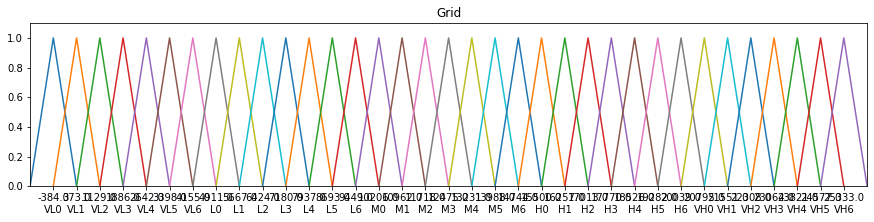

In [25]:
from pyFTS.partitioners import Grid

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,3])

part = Grid.GridPartitioner(data=train_uv,npart=35, names=names)

part.plot(ax)

#### Model Training 

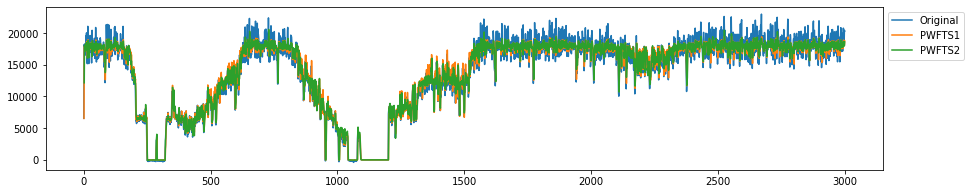

In [28]:
from pyFTS.models import hofts, pwfts

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,3])


ax.plot(test_uv[:3000], label='Original')
rows = []
for method in [pwfts.ProbabilisticWeightedFTS]:
  for order in [1, 2]:
    model = method(partitioner=part, order=order)

    model.shortname += str(order)

    model.fit(train_uv)

    forecasts = model.predict(test_uv)

    for k in np.arange(order):
      forecasts.insert(0,None)

    ax.plot(forecasts[:3000], label=model.shortname)

    models.append(model.shortname)

    Util.persist_obj(model, model.shortname)

    del(model)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))


    